In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 47.7MB/s 
     |████████████████████████████████| 3.8MB 38.7MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import Sequential

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 41.39 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
train_data_dir = '/content/dog-cat-full-dataset/data/train'
test_data_dir = '/content/dog-cat-full-dataset/data/test'


In [0]:
img_height = 32
img_width = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (32,32),
                                              classes = ['dogs', 'cats'],
                                              class_mode = 'binary',
                                              batch_size = 20
                                              )

Found 20000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                              target_size = (32,32),
                                              classes = ['dogs', 'cats'],
                                              class_mode = 'binary',
                                              batch_size = 20
                                              )

Found 5000 images belonging to 2 classes.


## build CNN base model

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation='relu',padding = 'same',kernel_initializer='he_uniform',input_shape = (32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))


In [0]:
opt = SGD(learning_rate = 0.01,momentum = 0.9 )
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),epochs= 4,validation_data=validation_generator,validation_steps= len(validation_generator),verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/4
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6975 - accuracy: 0.5081 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 2/4
1000/1000 [==============================] - 103s 103ms/step - loss: 0.6935 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 3/4
1000/1000 [==============================] - 103s 103ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 4/4
1000/1000 [==============================] - 103s 103ms/step - loss: 0.6934 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5000


In [0]:
history.history

{'accuracy': [0.50805, 0.4923, 0.50015, 0.49625],
 'loss': [0.6975028549432755,
  0.6934853581786156,
  0.6933797137737274,
  0.693422150671482],
 'val_accuracy': [0.4992, 0.5004, 0.5024, 0.5],
 'val_loss': [0.6931614556312561,
  0.6931533291339874,
  0.6931315536499023,
  0.6931650507450103]}

In [0]:
hist_acc = history.history['accuracy']
hist_val_acc = history.history['val_accuracy']
hist_loss = history.history['loss']
hist_val_loss = history.history['val_loss']


In [0]:
def plot_curve(history):
  epoch_range =range(1,5)
  plt.plot(epoch_range, hist_acc)
  plt.plot(epoch_range, hist_val_acc)
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, hist_loss)
  plt.plot(epoch_range, hist_val_loss)
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

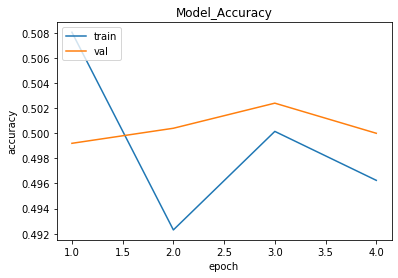

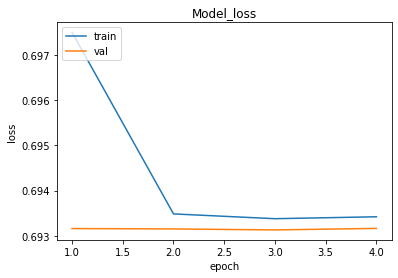

In [0]:
plot_curve(history)

## implement first 3 blocks of VGG model

## dropout and batch normalisation

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation='relu',padding = 'same',kernel_initializer='he_uniform',input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# second layer
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation='relu',padding = 'same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

# third layer
model = Sequential()
model.add(Conv2D(filters = 256, kernel_size = (3,3),activation='relu',padding = 'same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [0]:
opt = SGD(learning_rate = 0.01,momentum = 0.9 )
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),epochs= 5,validation_data=validation_generator,validation_steps= len(validation_generator),verbose = 1)

  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/5
1000/1000 [==============================] - 248s 248ms/step - loss: 0.6747 - accuracy: 0.6349 - val_loss: 0.5521 - val_accuracy: 0.7210
Epoch 2/5
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5944 - accuracy: 0.6937 - val_loss: 0.5653 - val_accuracy: 0.7148
Epoch 3/5
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5525 - accuracy: 0.7281 - val_loss: 0.5374 - val_accuracy: 0.7336
Epoch 4/5
1000/1000 [==============================] - 242s 242ms/step - loss: 0.5224 - accuracy: 0.7476 - val_loss: 0.5415 - val_accuracy: 0.7398
Epoch 5/5
1000/1000 [==============================] - 240s 240ms/step - loss: 0.4996 - accuracy: 0.7577 - val_loss: 0.5408 - val_accuracy: 0.7452


In [0]:
history.history

{'accuracy': [0.63495, 0.6937, 0.7281, 0.7476, 0.7577],
 'loss': [0.6747324089705944,
  0.5944209158271551,
  0.5525112513005733,
  0.5223732969164848,
  0.4996485375761986],
 'val_accuracy': [0.721, 0.7148, 0.7336, 0.7398, 0.7452],
 'val_loss': [0.552090721487999,
  0.5652598786354065,
  0.5373806848526,
  0.5415031589269638,
  0.5408283964395523]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

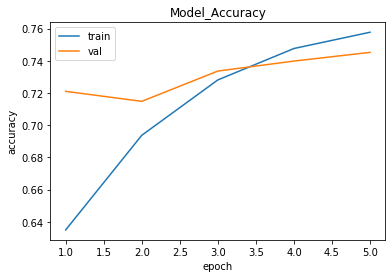

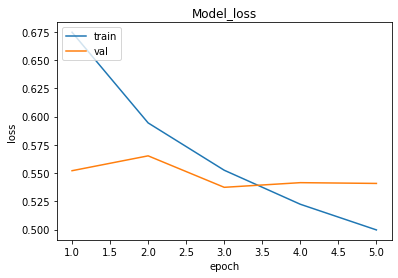

In [0]:
plot_curve(history)